In [367]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [368]:
os.chdir('/content/drive/MyDrive/Time Series')

In [369]:
ls

'Argan Oil Serum Sales Forecast.ipynb'
'Banglore House Price.ipynb'
 breast-cancer.data
'Breast Cancer.ipynb'
 Challenge.ipynb
 data_cleaning_challenge.csv
'Data Cleaning.ipynb'
 Data_Test.xlsx
 Data_Train.xlsx
 Fish.csv
'Fish regression.ipynb'
'New Challenge.ipynb'
'New Time Series'/
'Peeling Gel Data.xlsx'
 Rechallenge.ipynb
 regression_data.xlsx
 Regression.ipynb
 sales_data.csv
'Serum Sales Data.xlsx'
 SmoothingTechniques.ipynb
'Social Media Data Analysis with PCA.ipynb'
 Social_Network_Ads.csv
'Time Series'/
 Train.csv
 Untitled0.ipynb
 Untitled1.ipynb
 us_airline_carrier_passenger.csv
 Wine.csv


In [370]:
df = pd.read_csv('Train.csv')

In [371]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [372]:
df.shape

(13320, 9)

In [373]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [374]:
df.drop('society', axis = 1, inplace = True)

In [375]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [376]:
col = ['area_type', 'availability', 'location', 'size', 'bath', 'balcony']

In [377]:
for feature in col:
  val = df.groupby(feature)['price'].mean()
  print(val)

area_type
Built-up  Area          104.285498
Carpet  Area             89.502356
Plot  Area              208.495486
Super built-up  Area     92.971757
Name: price, dtype: float64
availability
14-Jul                   43.710000
14-Nov                   43.710000
15-Aug                   62.000000
15-Dec                  130.000000
15-Jun                   97.000000
                           ...    
22-Mar                   49.000000
22-May                  225.500000
22-Nov                   78.370000
Immediate Possession     98.921875
Ready To Move           115.179137
Name: price, Length: 81, dtype: float64
location
 Anekal                  16.000000
 Banaswadi               35.000000
 Basavangudi             50.000000
 Bhoganhalli             22.890000
 Devarabeesana Halli    124.833333
                           ...    
t.c palya               160.000000
tc.palya                 60.750000
vinayakanagar           200.000000
white field,kadugodi    275.000000
whitefiled               

In [378]:
df = df[df['location'].notna()]

In [379]:
df.isnull().sum()

area_type         0
availability      0
location          0
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [380]:
df.groupby('size')['price'].mean()

size
1 BHK          39.525204
1 Bedroom      72.851143
1 RK           28.122308
10 BHK        342.500000
10 Bedroom    561.250000
11 BHK        255.000000
11 Bedroom    160.000000
12 Bedroom    300.000000
13 BHK        275.000000
14 BHK        125.000000
16 BHK        550.000000
18 Bedroom    200.000000
19 BHK        490.000000
2 BHK          57.428640
2 Bedroom      93.563465
27 BHK        230.000000
3 BHK         104.957917
3 Bedroom     158.218976
4 BHK         278.415220
4 Bedroom     265.067379
43 Bedroom    660.000000
5 BHK         425.618644
5 Bedroom     252.929293
6 BHK         207.833333
6 Bedroom     226.455497
7 BHK         389.294118
7 Bedroom     214.686747
8 BHK         172.000000
8 Bedroom     209.666667
9 BHK         248.250000
9 Bedroom     240.847826
Name: price, dtype: float64

In [381]:
df.loc[df['size'].isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,5000,NaN,NaN,400.000


In [382]:
df = df[df['size'].notna()]

In [383]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             57
balcony         593
price             0
dtype: int64

In [384]:
df = df[df['bath'].notna()]

In [385]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony         536
price             0
dtype: int64

In [386]:
df.shape

(13246, 8)

In [387]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [388]:
df.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [389]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [390]:
df[-df['total_sqft'].apply(is_float)].head(20)

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,4125Perch,9.0,NaN,265.000
661,Super built-up Area,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000


In [391]:
def area_to_numeric(x):
  token = x.split('-')
  if token == 2:
    return((float(token[0]) + float(token[1])) / 2)
  try:
    return(float(x))
  except:
    return None

In [392]:
df['total_sqft'] = df['total_sqft'].apply(area_to_numeric)

In [393]:
df[-df['total_sqft'].apply(is_float)].head(20)

,area_type,availability,location,size,total_sqft,bath,balcony,price


In [394]:
df.iloc[648,:]

area_type       Super built-up  Area
availability                  20-Oct
location              Kanakpura Road
size                           3 BHK
total_sqft                      1100
bath                               2
balcony                            1
price                             58
Name: 654, dtype: object

In [395]:
df.shape

(13246, 8)

In [396]:
df.loc[df['availability'] == '18-Mar'].head(50)

,area_type,availability,location,size,total_sqft,bath,balcony,price
51,Super built-up Area,18-Mar,Bhoganhalli,3 BHK,1670.0,3.0,1.0,99.000
122,Super built-up Area,18-Mar,Hebbal,4 BHK,NaN,4.0,0.0,477.000
339,Plot Area,18-Mar,T.C PALYA,2 Bedroom,1200.0,2.0,0.0,79.000
365,Super built-up Area,18-Mar,Chandapura,1 BHK,530.0,1.0,0.0,11.660
544,Plot Area,18-Mar,Whitefield,3 Bedroom,1500.0,3.0,1.0,61.950
656,Built-up Area,18-Mar,Haralur Road,4 BHK,3385.0,5.0,NaN,260.000
672,Built-up Area,18-Mar,Bettahalsoor,4 Bedroom,NaN,4.0,0.0,445.000
922,Super built-up Area,18-Mar,Naganathapura,2 BHK,1001.0,2.0,2.0,33.030
943,Built-up Area,18-Mar,Kundalahalli,2 BHK,1047.0,2.0,1.0,82.000
1019,Plot Area,18-Mar,Marathi Layout,1 Bedroom,NaN,1.0,0.0,110.000


In [397]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft      190
bath              0
balcony         536
price             0
dtype: int64

In [398]:
df = df[df['total_sqft'].notna()]

In [399]:
df = df[df['balcony'].notna()]

In [400]:
df['price_psft'] = df['price'] * 100000 / df['total_sqft']

In [401]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_psft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


In [402]:
df['bhk'] = df['size'].str.split(' ', expand = True)[0]

In [403]:
df['location'].nunique()

1259

In [404]:
loc = df['location'].value_counts().sort_values()

In [405]:
len(loc[loc < 10])

1012

In [406]:
loc_10 = loc[loc < 10]
len(loc_10)

1012

In [407]:
val_loc_10 = loc_10.index

In [408]:
df['location'] = np.where(df['location'].isin(val_loc_10), 'other', df['location'])

In [409]:
df['location'].nunique()

248

In [410]:
df.groupby('location').mean()

,total_sqft,bath,balcony,price,price_psft
location,,,,,
Devarachikkanahalli,1266.500000,2.214286,1.785714,62.714286,4969.906245
1st Block Jayanagar,1768.333333,3.416667,1.666667,223.833333,11629.672896
1st Block Koramangala,1934.500000,3.300000,2.200000,283.450000,13849.390916
1st Phase JP Nagar,1804.380952,3.190476,1.761905,184.595238,10624.623133
2nd Phase Judicial Layout,1173.272727,2.090909,1.636364,46.181818,4048.701183
...,...,...,...,...,...
Yelahanka,1762.341709,2.462312,1.597990,84.684322,5359.253626
Yelahanka New Town,1175.600000,1.850000,1.375000,85.512500,5756.231230
Yelenahalli,1274.166667,2.166667,2.000000,51.185000,4026.305111


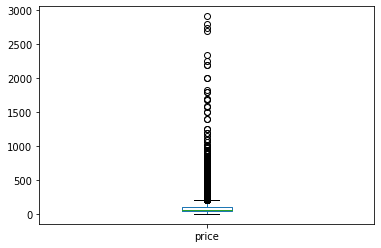

In [411]:
df['price'].plot(kind = 'box')

In [412]:
iqr = df['price_psft'].quantile(0.75) - df['price_psft'].quantile(0.25)
upper = df['price_psft'].quantile(0.75) + iqr
lower = df['price_psft'].quantile(0.25) - iqr
upper, lower

(10102.509633836056, 1308.9249554354583)

In [414]:
dff = df.loc[(df['price_psft'] < upper)]

In [415]:

dff.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_psft,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000,2


In [416]:
dff.shape

(11012, 10)

In [417]:
dff['bhk'] = pd.to_numeric(dff['bhk'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [418]:

dff.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
price_psft      float64
bhk               int64
dtype: object

In [419]:
iqr = dff['bhk'].quantile(0.75) - dff['bhk'].quantile(0.25)
upper = dff['bhk'].quantile(0.75) + iqr
lower = dff['bhk'].quantile(0.25) - iqr
upper, lower

(4.0, 1.0)

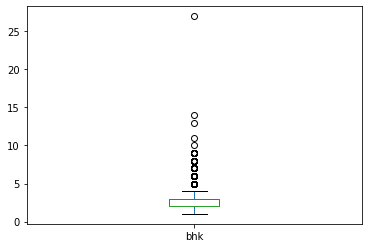

In [420]:
dff['bhk'].plot(kind = 'box')

In [421]:
dff.drop(dff.loc[dff['bhk'] > 4].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [422]:
dff.shape

(10701, 10)

In [423]:
dff.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_psft,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000,2


In [424]:
dff.drop(['availability', 'size'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [425]:
dff.head()

,area_type,location,total_sqft,bath,balcony,price,price_psft,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,3699.810606,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4615.384615,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,4305.555556,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,6245.890861,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,4250.000000,2


In [426]:
#dfa = pd.get_dummies(dff['area_type'], drop_first = True)

In [427]:
dfl = pd.get_dummies(dff['location'], drop_first = True)

In [428]:
dffinal = pd.concat([dff, dfl], axis = 1)

In [429]:
dffinal.head()

,area_type,location,total_sqft,bath,balcony,price,price_psft,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,3699.810606,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4615.384615,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,4305.555556,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,6245.890861,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,4250.000000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [430]:
dffinal.drop(['area_type', 'location', 'balcony'], axis = 1, inplace = True)

In [431]:
X = dffinal.drop(['price'],axis='columns')
y = dffinal.price

In [432]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [433]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7932188133089475